In [7]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting

import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance
import shap #for SHAP values
from pdpbox import pdp, info_plots #for partial plots

np.random.seed(123) #ensure reproducibility
pd.options.mode.chained_assignment = None  #hide any pandas warnings

In [8]:
dt = pd.read_csv('heart.csv')

In [9]:
dt.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [10]:
dt.columns = ['edad', 'sexo', 'tipo_dolor', 'tensión_arterial', 
              'colesterol', 'glucemia', 'ecg', 'max_frec_cardiaca', 
              'angina_ejercicio', 'depresion_st', 'pendiente_st', 
              'num_valvulas_mayores', 'talasemia', 'enfermedad']

In [11]:
dt['sexo'][dt['sexo'] == 0] = 'mujer'
dt['sexo'][dt['sexo'] == 1] = 'varon'

dt['tipo_dolor'][dt['tipo_dolor'] == 1] = 'angina tipica'
dt['tipo_dolor'][dt['tipo_dolor'] == 2] = 'angina atipica'
dt['tipo_dolor'][dt['tipo_dolor'] == 3] = 'dolor no anginoso'
dt['tipo_dolor'][dt['tipo_dolor'] == 4] = 'asintomatico'

dt['glucemia'][dt['glucemia'] == 0] = '<120mg/ml'
dt['glucemia'][dt['glucemia'] == 1] = '>120mg/ml'

dt['ecg'][dt['ecg'] == 0] = 'normal'
dt['ecg'][dt['ecg'] == 1] = 'anomalia onda ST-T'
dt['ecg'][dt['ecg'] == 2] = 'hipertrofia ventriculo izdo'

dt['angina_ejercicio'][dt['angina_ejercicio'] == 0] = 'no'
dt['angina_ejercicio'][dt['angina_ejercicio'] == 1] = 'si'

dt['pendiente_st'][dt['pendiente_st'] == 1] = 'creciente'
dt['pendiente_st'][dt['pendiente_st'] == 2] = 'plana'
dt['pendiente_st'][dt['pendiente_st'] == 3] = 'decreciente'

dt['talasemia'][dt['talasemia'] == 1] = 'normal'
dt['talasemia'][dt['talasemia'] == 2] = 'defecto fijo'
dt['talasemia'][dt['talasemia'] == 3] = 'defecto reversible'

In [12]:
dt.dtypes

edad                      int64
sexo                     object
tipo_dolor               object
tensión_arterial          int64
colesterol                int64
glucemia                 object
ecg                      object
max_frec_cardiaca         int64
angina_ejercicio         object
depresion_st            float64
pendiente_st             object
num_valvulas_mayores      int64
talasemia                object
enfermedad                int64
dtype: object

In [13]:
dt['sexo'] = dt['sexo'].astype('object')
dt['tipo_dolor'] = dt['tipo_dolor'].astype('object')
dt['glucemia'] = dt['glucemia'].astype('object')
dt['ecg'] = dt['ecg'].astype('object')
dt['angina_ejercicio'] = dt['angina_ejercicio'].astype('object')
dt['pendiente_st'] = dt['pendiente_st'].astype('object')
dt['talasemia'] = dt['talasemia'].astype('object')

In [14]:
dt.dtypes

edad                      int64
sexo                     object
tipo_dolor               object
tensión_arterial          int64
colesterol                int64
glucemia                 object
ecg                      object
max_frec_cardiaca         int64
angina_ejercicio         object
depresion_st            float64
pendiente_st             object
num_valvulas_mayores      int64
talasemia                object
enfermedad                int64
dtype: object

In [15]:
dt = pd.get_dummies(dt, drop_first=True)

In [16]:
dt.head()

,edad,tensión_arterial,colesterol,max_frec_cardiaca,depresion_st,num_valvulas_mayores,enfermedad,sexo_varon,tipo_dolor_angina atipica,tipo_dolor_angina tipica,tipo_dolor_dolor no anginoso,glucemia_>120mg/ml,ecg_hipertrofia ventriculo izdo,ecg_normal,angina_ejercicio_si,pendiente_st_creciente,pendiente_st_plana,talasemia_defecto fijo,talasemia_defecto reversible,talasemia_normal
0,63,145,233,150,2.3,0,1,1,0,0,1,1,0,1,0,0,0,0,0,1
1,37,130,250,187,3.5,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0
3,56,120,236,178,0.8,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(dt.drop('enfermedad', 1),
                                                    dt['enfermedad'], 
                                                    test_size = .2, 
                                                    random_state=10)
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

In [19]:
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix

array([[26,  9],
       [ 3, 23]], dtype=int64)

In [20]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensibilidad: ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Especifidad: ', specificity)

Sensibilidad:  0.896551724137931
Especifidad:  0.71875


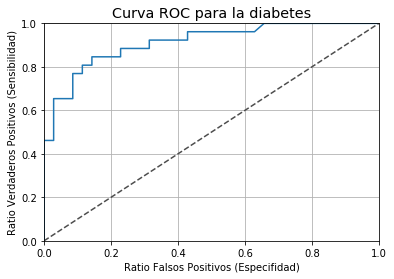

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('Curva ROC para la diabetes')
plt.xlabel('Ratio Falsos Positivos (Especifidad)')
plt.ylabel('Ratio Verdaderos Positivos (Sensibilidad)')
plt.grid(True)

In [22]:
auc(fpr, tpr)

0.9126373626373626

In [23]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0361 ± 0.0321,talasemia_defecto reversible
0.0295 ± 0.0245,sexo_varon
0.0197 ± 0.0382,angina_ejercicio_si
0.0164 ± 0.0000,tipo_dolor_dolor no anginoso
0.0164 ± 0.0464,max_frec_cardiaca
0.0131 ± 0.0245,talasemia_defecto fijo
0.0066 ± 0.0262,depresion_st
0.0033 ± 0.0525,num_valvulas_mayores
0.0033 ± 0.0131,glucemia_>120mg/ml
0.0000 ± 0.0207,tipo_dolor_angina atipica


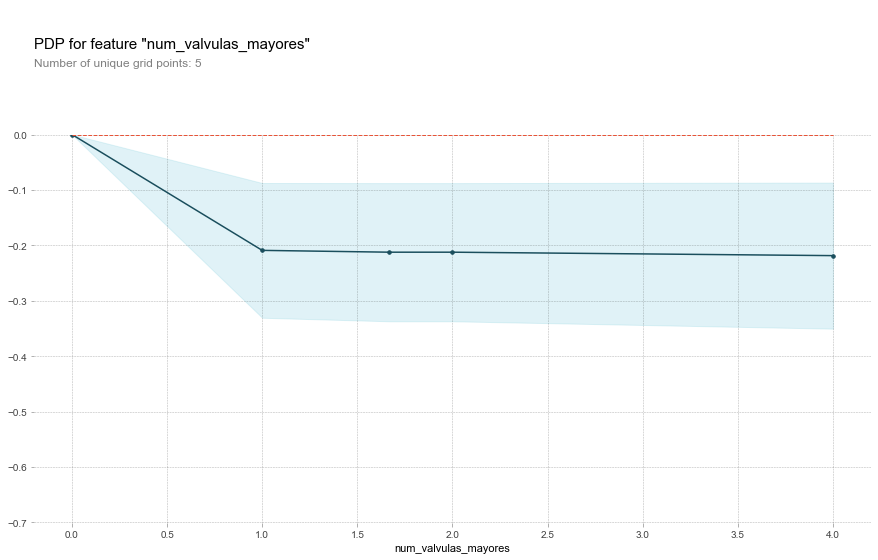

In [24]:
base_features = dt.columns.values.tolist()
base_features.remove('enfermedad')

feat_name = 'num_valvulas_mayores'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

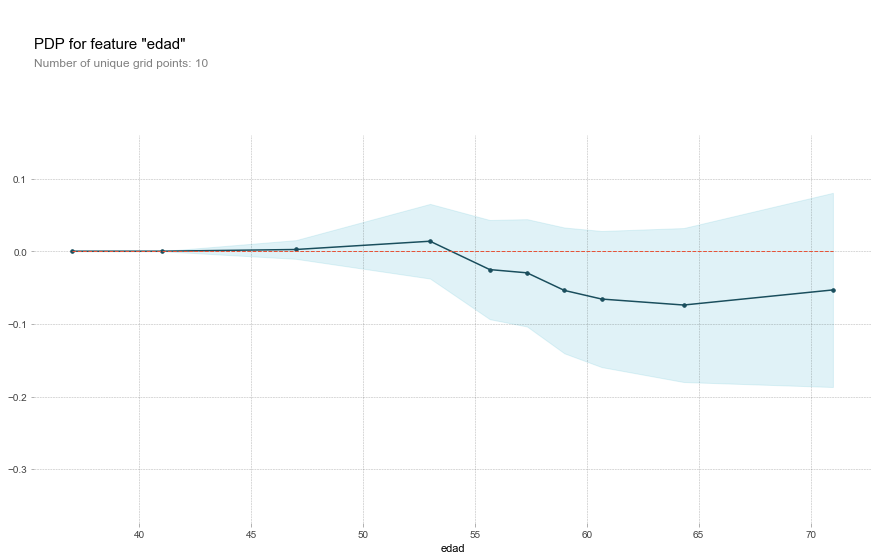

In [25]:
feat_name = 'edad'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

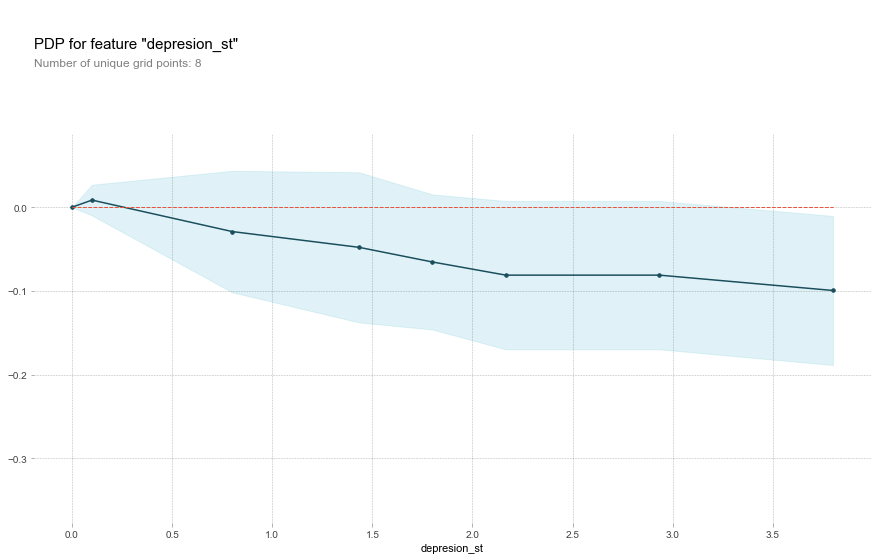

In [26]:
feat_name = 'depresion_st'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

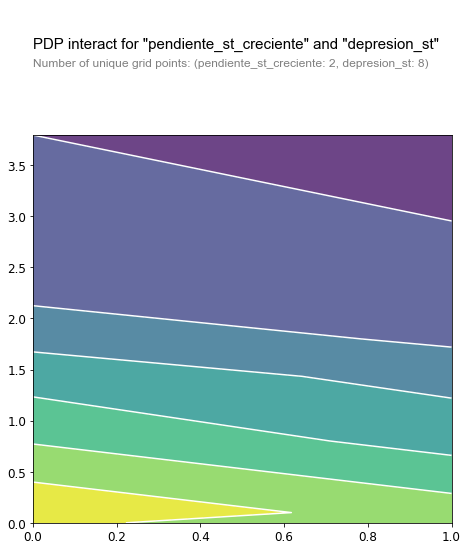

In [27]:
inter1 = pdp.pdp_interact(model=model, dataset=X_test, model_features=base_features, features=['pendiente_st_creciente', 'depresion_st'])
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=['pendiente_st_creciente', 'depresion_st'], plot_type='contour')
plt.show()

TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

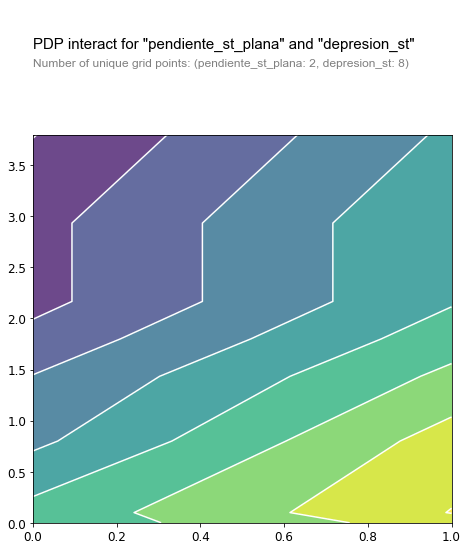

In [28]:
inter1 = pdp.pdp_interact(model=model, dataset=X_test, model_features=base_features, features=['pendiente_st_plana', 'depresion_st'])
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=['pendiente_st_plana', 'depresion_st'], plot_type='contour')
plt.show()

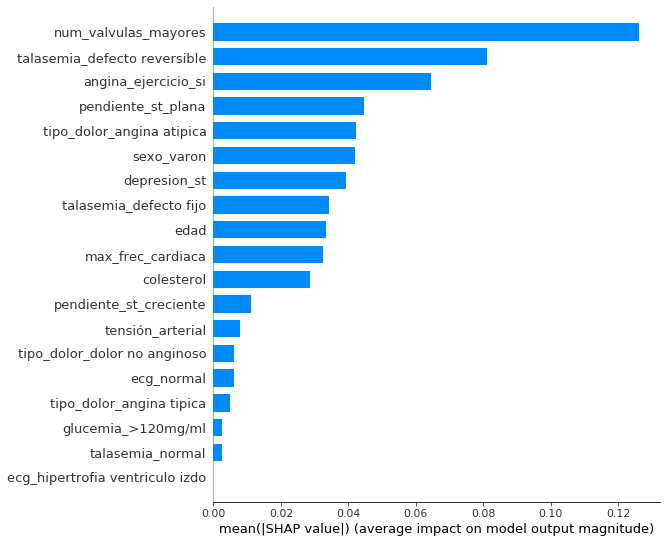

In [29]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

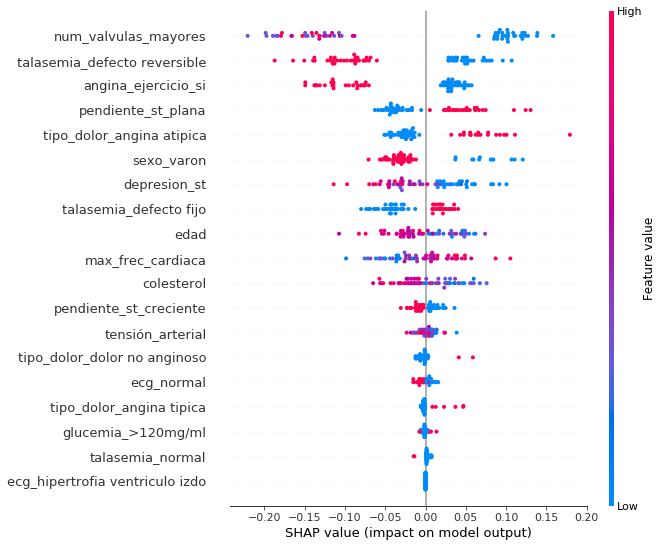

In [30]:
shap.summary_plot(shap_values[1], X_test)

In [31]:
def heart_disease_risk_factors(model, patient):

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(patient)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

In [32]:
data_for_prediction = X_test.iloc[1,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

In [33]:
data_for_prediction = X_test.iloc[3,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

In [34]:
shap_values = explainer.shap_values(X_train.iloc[:50])
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[:50])